# Table of contents

- Importing libraries
- Question 2: security implications
- Questions 3: 
    - a. Regional data segmentations
    - b. Establishing the spending habits between regions
- Question 4: eliminating low spenders
- Questions 5,7,8: 
    - creating customer profiles based on: age, income, marital status and dependents
    - aggregate mean, max, min to customer profiles
    - Compare your customer profiles with regions and departments. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\alexa\OneDrive\Documents\data analytics\Achievement 4\01-09-2022 Instacart Basket Analysis'

In [3]:
df_total = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_combined.pkl'))

# Question 2: security implications
in this data set we find, cust name, state, age, number of dependents, marital status and income. These present security risks. If we remove the customer name. They will no longer be identifiable.

In [4]:
#remove names from dataframe
df_total.drop(['First Name', 'Last Name'],inplace=True, axis=1)

# Question 3: Regional data segmentation

In [5]:
#join region dataframe to this set
df_regions = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'regions.csv'), index_col = False)

In [6]:
df_merged = df_total.merge(df_regions, on = 'State')

In [7]:
df_merged.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,...,Median_since_last_ordered,Order_frequency_flag,Gender,State,Age,Date joined,No of dependents,Marital status,income,Region
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South


In [8]:
df_merged['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     4464653
Name: Region, dtype: int64

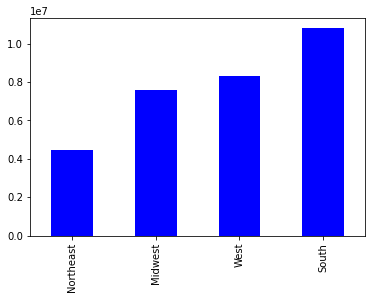

In [9]:
#create bar chart
bar_region=df_merged['Region'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [10]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region.final.png'))

# Question 3b: establishing the spending habits between regions

In [11]:
#looking at all columns within dataframe
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_week',
       'order_hour_of_day', 'Days since last order', 'New customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest day', '2 busy/slow days', 'busiest_period_of_day', 'max order',
       'loyalty_flag', 'Mean_price', 'Spend_flag', 'Median_since_last_ordered',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'Date joined',
       'No of dependents', 'Marital status', 'income', 'Region'],
      dtype='object')

In [12]:
#removing prices above 100$
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [13]:
df_merged.groupby('Region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
Region                        
Midwest    7.792584  1.0  25.0
Northeast  7.781106  1.0  25.0
South      7.794918  1.0  25.0
West       7.790355  1.0  25.0

In [14]:
df_merged.groupby('Region').agg({'Median_since_last_ordered': ['mean', 'min', 'max']})

Median_since_last_ordered           
                               mean  min   max
Region                                        
Midwest                   10.458222  0.0  30.0
Northeast                 10.374010  0.0  30.0
South                     10.396853  0.0  30.0
West                      10.360148  0.0  30.0

as we can see above the numbers between regions are quite the same.

# Question 4: eliminating the low spenders

In [15]:
# create total order column to establish the level of user activity:
df_merged['total_orders']=df_merged.groupby(['user_id']).user_id.transform('count')

In [16]:
result = []

for value in df_merged['total_orders']:
    if value <5:
        result.append('Low_activity')
    else:
                result.append('Regular_activity')

In [17]:
#creating activity flag column
df_merged['activity_flag']=result

In [18]:
df_merged['activity_flag'].value_counts(dropna=False)

Regular_activity    31143977
Low_activity            2799
Name: activity_flag, dtype: int64

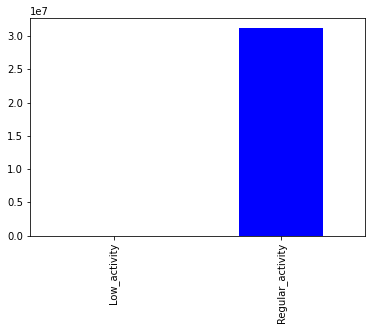

In [19]:
#create bar chart
bar_activityflag=df_merged['activity_flag'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [20]:
bar_activityflag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_activityflag.final.png'))

In [21]:
#creating subset for low activity customers
df_low_activity_cust= df_merged[df_merged['activity_flag']=='Low Activity']

In [22]:
#exporting subset data frame
df_low_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared data', 'low_activity_cust.pkl'))

In [23]:
#excluding sample from dataset
df_merged.drop(df_merged[df_merged['activity_flag']=='Low Activity'].index, inplace=True)

In [24]:
df_merged['activity_flag'].value_counts()

Regular_activity    31143977
Low_activity            2799
Name: activity_flag, dtype: int64

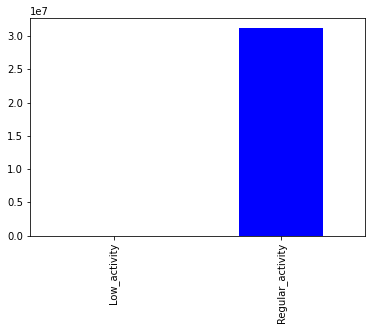

In [25]:
#create bar chart
bar_activityflag2=df_merged['activity_flag'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [26]:
bar_activityflag2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_activityflag2.final.png'))

In [27]:
pd.set_option('display.max_columns', None)
df_merged.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest day,2 busy/slow days,busiest_period_of_day,max order,loyalty_flag,Mean_price,Spend_flag,Median_since_last_ordered,Order_frequency_flag,Gender,State,Age,Date joined,No of dependents,Marital status,income,Region,total_orders,activity_flag
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Least busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Least busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity


# Questions 5,7,8: 
- creating customer profiles based on: age, income, marital status and dependents
- aggregate mean, max, min to customer profiles
- Compare your customer profiles with regions and departments. 

# creating customer profile: age groups

In [28]:
#age ranges
df_merged['Age'].min()

18

In [29]:
df_merged['Age'].max()

81

In [30]:
df_merged['Age'].mean()

49.45561408988205

In [31]:
#creating age groups and age flag
df_merged.loc[df_merged['Age'] <= 24, 'age_group'] = 'Young adult'
df_merged.loc[(df_merged['Age'] >24) & (df_merged['Age'] <=64), 'age_group'] = 'Adult'
df_merged.loc[df_merged['Age'] >= 65, 'age_group'] = 'Senior'

In [32]:
df_merged['age_group'].value_counts()

Adult          19472283
Senior          8235984
Young adult     3438509
Name: age_group, dtype: int64

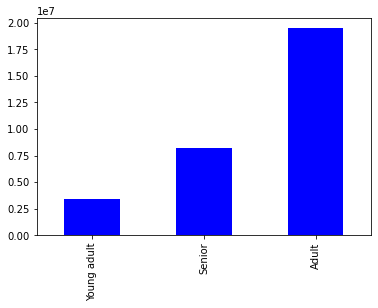

In [33]:
#create bar chart
bar_agegroup=df_merged['age_group'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [34]:
bar_agegroup.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_agegroup.final.png'))

# aggregating age groups

In [35]:
df_merged.groupby('age_group').agg({'prices': ['mean', 'max', 'min']})

prices           
                 mean   max  min
age_group                       
Adult        7.788898  25.0  1.0
Senior       7.796425  25.0  1.0
Young adult  7.791304  25.0  1.0

In [36]:
df_merged.groupby('age_group').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                                 mean   max  min
age_group                                       
Adult                       10.416312  30.0  0.0
Senior                      10.372803  30.0  0.0
Young adult                 10.361674  30.0  0.0

# comparing profile with regions and departments:

In [37]:
# age_group in comparaison to region
age_region=pd.crosstab(df_merged['Region'], df_merged['age_group'].sort_values(ascending=False))
age_region=age_region.reindex(['Young adult', 'Adult', 'Senior'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
age_region

age_group,Young adult,Adult,Senior
Region,,,
South,1218210,6737418,2836257
West,896692,5202141,2194080
Midwest,827642,4778839,1990844
Northeast,495965,2753885,1214803


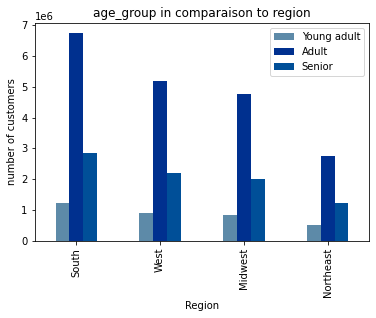

In [38]:
#Grouped bar chart. age_groups vs regions
bar_age_region=age_region.plot.bar(color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('age_group in comparaison to region')
plt.xlabel('Region')
plt.ylabel('number of customers')
plt.legend()

In [39]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.final.png'))

In [40]:
df_merged['age_group'].value_counts()

Adult          19472283
Senior          8235984
Young adult     3438509
Name: age_group, dtype: int64

In [61]:
#Measuring departments vs age_group
age_depart=pd.crosstab(df_merged['department'], df_merged['age_group'])
age_depart=age_depart.reindex(['Young adult', 'Adult', 'Senior'], axis="columns")
age_depart

age_group,Young adult,Adult,Senior
department,,,
alcohol,17967,91480,38063
babies,45535,257390,104633
bakery,124637,705400,297540
beverages,281327,1614412,686408
breakfast,75980,423524,176637
bulk,3727,20704,8907
canned goods,113472,641919,271574
dairy eggs,574856,3243634,1370166
deli,110849,633206,266333


In [62]:
#since we established that the most popular overall departments are produce, dairy egg, snacks and beverages we will concentrate on the age_group for only these deparments
df_age_depart2=df_merged.loc[df_merged['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages'])]

In [63]:
#creating stacked bar chart of departments vs age_groups
age_depart3=pd.crosstab(index=df_age_depart2['department'], columns=df_age_depart2['age_group'], normalize='index')
age_depart3=age_depart3.reindex(['Young adult', 'Adult', 'Senior'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
age_depart3_labels=pd.crosstab(index=df_age_depart2['department'], columns=df_age_depart2['age_group'])
age_depart3_labels=age_depart3_labels.reindex(['Young adult', 'Adult', 'Senior'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
age_depart3

age_group,Young adult,Adult,Senior
department,,,
produce,0.109859,0.625145,0.264997
dairy eggs,0.110791,0.625140,0.264070
snacks,0.109738,0.627171,0.263091
beverages,0.108951,0.625221,0.265828


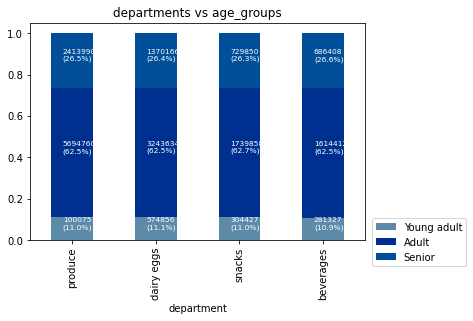

In [128]:
bar_age_depart=age_depart3.plot.bar(stacked=True,color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('departments vs age_groups')
plt.xlabel('department')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(age_depart3.loc[y],
                                         age_depart3_labels.loc[y],
                                          age_depart3.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 fontsize = 7.5,
                 color='white')

In [182]:
bar_age_depart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_depart2.final.png'))

# creating customer profile: income

In [66]:
#creating income flag
df_merged.loc[df_merged['income'] <=52000, 'income_flag'] ='low income'
df_merged.loc[(df_merged['income'] > 52000) & (df_merged['income'] <=156000), 'income_flag'] = 'Middle class'
df_merged.loc[df_merged['income'] >156000, 'income_flag'] = 'upper class'

 tier class income based on a 2018 average american imcome

In [67]:
df_merged['income_flag'].value_counts()

Middle class    24574247
low income       3725391
upper class      2847138
Name: income_flag, dtype: int64

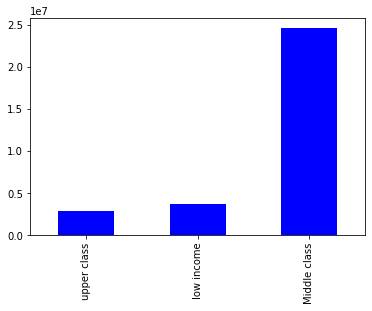

In [68]:
#create bar chart
bar_incomeflag=df_merged['income_flag'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [69]:
bar_incomeflag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_incomeflag.final.png'))

# aggregating income flags

In [70]:
df_merged.groupby('income_flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                  mean   max  min
income_flag                      
Middle class  7.932771  25.0  1.0
low income    6.741713  25.0  1.0
upper class   7.942249  25.0  1.0

In [71]:
df_merged.groupby('income_flag').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                                  mean   max  min
income_flag                                      
Middle class                 10.324941  30.0  0.0
low income                   11.090096  30.0  0.0
upper class                  10.131480  30.0  0.0

# comparing profile with regions and departments:

In [72]:
#Measuring income groups across regions
income_region=pd.crosstab(df_merged['Region'], df_merged['income_flag'].sort_values(ascending=False))
income_region=income_region.reindex(['low income', 'Middle class', 'upper class'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
income_region

income_flag,low income,Middle class,upper class
Region,,,
South,1315278,8482110,994497
West,970999,6565980,755934
Midwest,912447,5993969,690909
Northeast,526667,3532188,405798


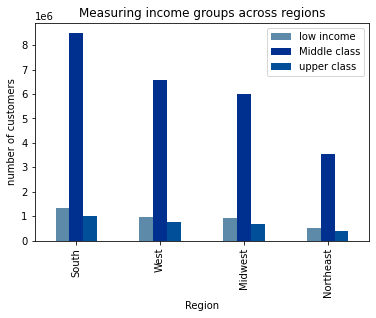

In [73]:
#Bar chart of income groups vs regions
bar_income_region=income_region.plot.bar(color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('Measuring income groups across regions')
plt.xlabel('Region')
plt.ylabel('number of customers')
plt.legend()

In [74]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region2.final.png'))

In [75]:
df_merged['price_range_loc'].value_counts()

Low range products     9731785
Mid range products      727149
High-range products     401836
Name: price_range_loc, dtype: int64

In [76]:
df_merged['income_flag'].value_counts()

Middle class    24574247
low income       3725391
upper class      2847138
Name: income_flag, dtype: int64

In [77]:
#Measuring and creating a bar chart for departments and income groups
income_depart=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['income_flag'], normalize='index')
income_depart=income_depart.reindex(['low income', 'Middle class', 'upper class'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
income_depart_label=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['income_flag'])
income_depart_label=income_depart_label.reindex(['low income', 'Middle class', 'upper class'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
income_depart_label


income_flag,low income,Middle class,upper class
department,,,
produce,924512,7366932,818063
dairy eggs,557083,4149178,482395
snacks,602046,1950028,222061
beverages,414524,1937586,230037


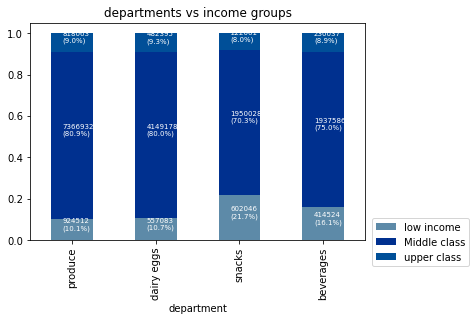

In [131]:
bar_income_depart=income_depart.plot.bar(stacked=True,color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('departments vs income groups')
plt.xlabel('department')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(income_depart.loc[y],
                                         income_depart_label.loc[y],
                                          income_depart.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 fontsize = 7,
                 color="white")

In [181]:
bar_income_depart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_depart2.final.png'))

# creating customer profile: martial status

# martial status aggregate

In [80]:
df_merged['Marital status'].value_counts()

married                             21847076
single                               5132016
divorced/widowed                     2666413
living with parents and siblings     1501271
Name: Marital status, dtype: int64

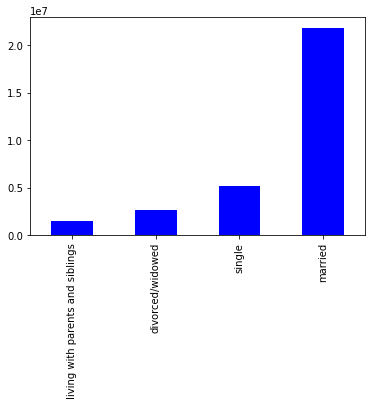

In [81]:
#create bar chart
bar_marital=df_merged['Marital status'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [82]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital.final.png'))

In [83]:
df_merged.groupby('Marital status').agg({'prices': ['mean', 'max', 'min']})

prices           
                                      mean   max  min
Marital status                                       
divorced/widowed                  7.798819  25.0  1.0
living with parents and siblings  7.800265  25.0  1.0
married                           7.791406  25.0  1.0
single                            7.783433  25.0  1.0

In [84]:
df_merged.groupby('Marital status').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                                                      mean   max  min
Marital status                                                       
divorced/widowed                                 10.327257  30.0  0.0
living with parents and siblings                 10.322749  30.0  0.0
married                                          10.417317  30.0  0.0
single                                           10.379239  30.0  0.0

# comparing profile with regions and departments:

In [132]:
# Measuring marital status in comparaison to region
Marital_region=pd.crosstab(df_merged['Region'], df_merged['Marital status'].sort_values(ascending=False))
Marital_region.reindex(['divorced/widowed', 'living with parents and sibilings', 'married', 'single'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
Marital_region

Marital status,divorced/widowed,living with parents and siblings,married,single
Region,,,,
Midwest,646401,366517,5325608,1258799
Northeast,395660,218782,3126644,723567
South,920849,529584,7560642,1780810
West,703503,386388,5834182,1368840


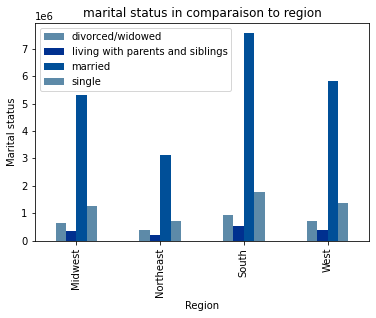

In [133]:
#Grouped bar chart. marital status vs regions
bar_martial_region=Marital_region.plot.bar(color=['#5D8AA8', '#00308F', '#004F98'])
plt.title('marital status in comparaison to region')
plt.xlabel('Region')
plt.ylabel('Marital status')
plt.legend()

In [134]:
bar_martial_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_martial_region.final.png'))

In [135]:
#Measuring departments vs Marital status
Marital_depart2=pd.crosstab(df_merged['department'], df_merged['Marital status'])
Marital_depart2=Marital_depart2.reindex(['divorced/widowed', 'living with parents and siblings', 'married', 'single'], axis="columns")
Marital_depart2

Marital status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,12317,8794,101699,24700
babies,33844,19764,284816,69134
bakery,97108,54522,788912,187035
beverages,222365,120220,1812508,427054
breakfast,57330,33614,474270,110927
bulk,2647,1622,23779,5290
canned goods,85575,49556,722793,169041
dairy eggs,444495,253372,3635629,855160
deli,87139,48928,705880,168441


In [136]:
#creating a bar chart for department vs marital status
Marital_depart3=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Marital status'], normalize='index')
Marital_depart3=Marital_depart3.reindex(['divorced/widowed', 'living with parents and siblings', 'married', 'single'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Marital_depart3_labels=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Marital status'])
Marital_depart3_labels=Marital_depart3_labels.reindex(['divorced/widowed', 'living with parents and siblings', 'married', 'single'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Marital_depart3

Marital status,divorced/widowed,living with parents and siblings,married,single
department,,,,
produce,0.085657,0.047607,0.701411,0.165325
dairy eggs,0.085667,0.048832,0.700688,0.164813
snacks,0.085766,0.047812,0.701737,0.164685
beverages,0.086116,0.046558,0.701938,0.165387


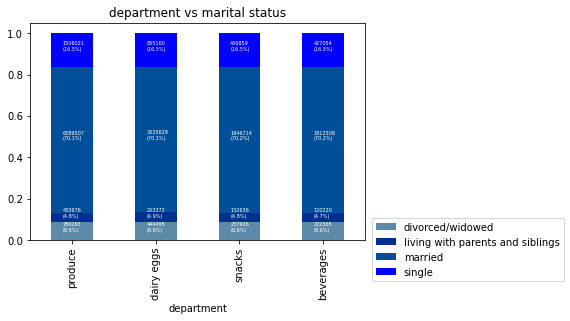

In [173]:
bar_Martial_depart=Marital_depart3.plot.bar(stacked=True,color=['#5D8AA8', '#00308F', '#004F98','blue'])
plt.title('department vs marital status')
plt.xlabel('department')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(Marital_depart3.loc[y],
                                         Marital_depart3_labels.loc[y],
                                          Marital_depart3.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 fontsize = 5,
                 color="white")

In [180]:
bar_Martial_depart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Martial_depart.final.png'))

# creating customer profile: Dependent flag

In [42]:
#creating a depended flag
df_merged.loc[df_merged['No of dependents']==0, 'dependent_flag'] = 'No dependents'
df_merged.loc[df_merged['No of dependents'] >0, 'dependent_flag'] = 'Parent'

In [43]:
df_merged['dependent_flag'].value_counts()

Parent           23348347
No dependents     7798429
Name: dependent_flag, dtype: int64

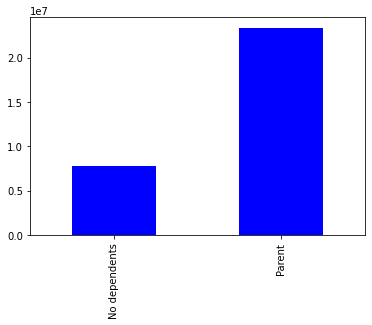

In [44]:
#create bar chart
bar_dependentflag=df_merged['dependent_flag'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [45]:
bar_dependentflag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependentflag.final.png'))

# aggregating the dependent flag

In [46]:
df_merged.groupby('dependent_flag').agg({'prices': ['mean', 'max', 'min']})

prices           
                    mean   max  min
dependent_flag                     
No dependents   7.788694  25.0  1.0
Parent          7.791976  25.0  1.0

In [47]:
df_merged.groupby('dependent_flag').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                                    mean   max  min
dependent_flag                                     
No dependents                  10.361465  30.0  0.0
Parent                         10.411236  30.0  0.0

# comparing profile with regions and departments:

In [48]:
# dependent_flag in comparaison to region
dependent_region=pd.crosstab(df_merged['Region'], df_merged['dependent_flag'].sort_values(ascending=False))
dependent_region=dependent_region.reindex(['No dependents', 'Parent'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
dependent_region

dependent_flag,No dependents,Parent
Region,,
South,2701659,8090226
West,2072343,6220570
Midwest,1905200,5692125
Northeast,1119227,3345426


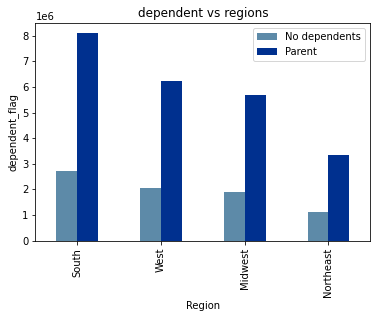

In [49]:
#Grouped bar chart. dependent vs regions
bar_dependent_region=dependent_region.plot.bar(color=['#5D8AA8', '#00308F'])
plt.title('dependent vs regions')
plt.xlabel('Region')
plt.ylabel('dependent_flag')
plt.legend()

In [50]:
bar_dependent_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependent_region.final.png'))

In [139]:
#Measuring departments vs dependent_flag
Dependent_depart2=pd.crosstab(df_merged['department'], df_merged['dependent_flag'])
Dependent_depart2=Dependent_depart2.reindex(['No dependents', 'Parent'], axis="columns")
Dependent_depart2

dependent_flag,No dependents,Parent
department,,
alcohol,37017,110493
babies,102978,304580
bakery,284143,843434
beverages,649419,1932728
breakfast,168257,507884
bulk,7937,25401
canned goods,254616,772349
dairy eggs,1299655,3889001
deli,255580,754808


In [140]:
#creating a bar chart for department vs dependent_flag
Dependent_depart3=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['dependent_flag'], normalize='index')
Dependent_depart3=Dependent_depart3.reindex(['No dependents', 'Parent'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Dependent_depart3_labels=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['dependent_flag'])
Dependent_depart3_labels=Dependent_depart3_labels.reindex(['No dependents', 'Parent'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Dependent_depart3

dependent_flag,No dependents,Parent
department,,
produce,0.250982,0.749018
dairy eggs,0.250480,0.749520
snacks,0.250451,0.749549
beverages,0.251503,0.748497


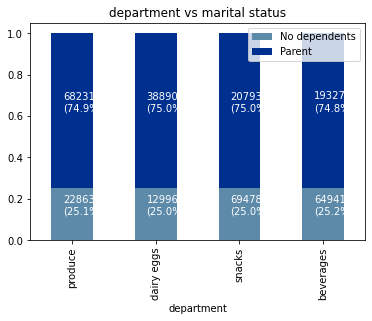

In [141]:
bar_Dependent_depart3=Dependent_depart3.plot.bar(stacked=True,color=['#5D8AA8', '#00308F'])
plt.title('department vs marital status')
plt.xlabel('department')
plt.legend()
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(Dependent_depart3.loc[y],
                                         Dependent_depart3_labels.loc[y],
                                          Dependent_depart3.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white")

In [142]:
bar_Dependent_depart3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Dependent_depart3.final.png'))

# Determening which departements to create flags

In [52]:
#flag based on certain food departments
df_depart=pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'departments_wrangled.csv'),index_col=False)

In [53]:
df_depart.head(25)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# creating customer profile: Pet flag

In [54]:
#creating a pet flag
df_depart.rename(columns = {'Unnamed: 0': 'department_id'}, inplace=True)

In [55]:
df_depart.head(25)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [56]:
df_depart.value_counts()

department_id  department     
1              frozen             1
12             meat seafood       1
20             deli               1
19             snacks             1
18             babies             1
17             household          1
16             dairy eggs         1
15             canned goods       1
14             breakfast          1
13             pantry             1
11             personal care      1
2              other              1
10             bulk               1
9              dry goods pasta    1
8              pets               1
7              beverages          1
6              international      1
5              alcohol            1
4              produce            1
3              bakery             1
21             missing            1
dtype: int64

In [57]:
df_merged= df_merged.merge(df_depart, on = 'department_id')

In [58]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_week',
       'order_hour_of_day', 'Days since last order', 'New customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest day', '2 busy/slow days', 'busiest_period_of_day', 'max order',
       'loyalty_flag', 'Mean_price', 'Spend_flag', 'Median_since_last_ordered',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'Date joined',
       'No of dependents', 'Marital status', 'income', 'Region',
       'total_orders', 'activity_flag', 'age_group', 'dependent_flag',
       'department'],
      dtype='object')

In [59]:
df_merged['department'].value_counts()

produce            9109507
dairy eggs         5188656
snacks             2774135
beverages          2582147
frozen             2150710
pantry             1802447
bakery             1127577
canned goods       1026965
deli               1010388
dry goods pasta     833013
household           709970
meat seafood        681740
breakfast           676141
personal care       430565
babies              407558
international       258750
alcohol             147510
pets                 94036
missing              66678
other                34945
bulk                 33338
Name: department, dtype: int64

In [60]:
df_merged.head()

,order_id,user_id,order_number,Order_day_of_week,order_hour_of_day,Days since last order,New customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest day,2 busy/slow days,busiest_period_of_day,max order,loyalty_flag,Mean_price,Spend_flag,Median_since_last_ordered,Order_frequency_flag,Gender,State,Age,Date joined,No of dependents,Marital status,income,Region,total_orders,activity_flag,age_group,dependent_flag,department
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity,Adult,Parent,beverages
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity,Adult,Parent,beverages
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Regular busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity,Adult,Parent,beverages
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Least busy,Two slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity,Adult,Parent,beverages
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid range products,Least busy,Two slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent cust,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular_activity,Adult,Parent,beverages


# pet flag

In [143]:
#creating pet flag
df_merged['Has_pets']=['yes' if x=='pets' else 'no' for x in df_merged['department']]
df_merged['Has_pets']=df_merged.groupby(['user_id'])['Has_pets'].transform(np.max)

In [144]:
df_merged['Has_pets'].value_counts(dropna=False)

no     27753706
yes     3393070
Name: Has_pets, dtype: int64

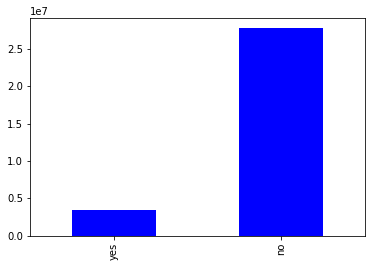

In [145]:
#create bar chart
bar_pets=df_merged['Has_pets'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [146]:
bar_pets.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pets.final.png'))

# creating aggregates on pet flag

In [147]:
df_merged.groupby('Has_pets').agg({'prices': ['mean', 'max', 'min']})

prices           
              mean   max  min
Has_pets                     
no        7.788493  25.0  1.0
yes       7.812923  25.0  1.0

In [148]:
df_merged.groupby('Has_pets').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                              mean   max  min
Has_pets                                     
no                       10.517021  30.0  0.0
yes                       9.431576  30.0  0.0

# comparing profile with regions and departments:

In [149]:
# has pets in comparaison to region
pets_region=pd.crosstab(df_merged['Region'], df_merged['Has_pets'].sort_values(ascending=False))
pets_region=pets_region.reindex(['no', 'yes'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
pets_region

Has_pets,no,yes
Region,,
South,9650143,1141742
West,7363501,929412
Midwest,6752777,844548
Northeast,3987285,477368


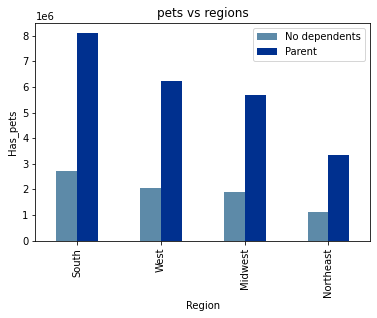

In [150]:
#Grouped bar chart. pets vs regions
bar_pets_region=dependent_region.plot.bar(color=['#5D8AA8', '#00308F'])
plt.title('pets vs regions')
plt.xlabel('Region')
plt.ylabel('Has_pets')
plt.legend()

In [151]:
bar_pets_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pets_region.final.png'))

In [152]:
#Measuring pets vs dependent_flag
Pets_depart2=pd.crosstab(df_merged['department'], df_merged['Has_pets'])
Pets_depart2=Pets_depart2.reindex(['no', 'yes'], axis="columns")
Pets_depart2

Has_pets,no,yes
department,,
alcohol,121513,25997
babies,372785,34773
bakery,992161,135416
beverages,2269368,312779
breakfast,603381,72760
bulk,31262,2076
canned goods,902772,124193
dairy eggs,4674137,514519
deli,902700,107688


In [153]:
#creating a bar chart for pets vs dependent_flag
Pets_depart3=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Has_pets'], normalize='index')
Pets_depart3=Pets_depart3.reindex(['no', 'yes'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Pets_depart3_labels=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Has_pets'])
Pets_depart3_labels=Pets_depart3_labels.reindex(['no', 'yes'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
Pets_depart3

Has_pets,no,yes
department,,
produce,0.917124,0.082876
dairy eggs,0.900838,0.099162
snacks,0.892324,0.107676
beverages,0.878869,0.121131


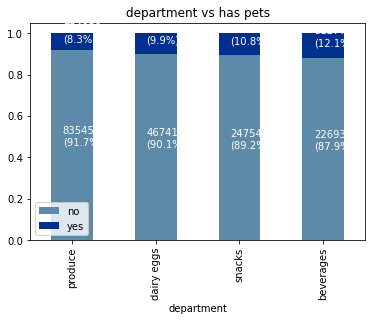

In [177]:
bar_Pets_depart3=Pets_depart3.plot.bar(stacked=True,color=['#5D8AA8', '#00308F'])
plt.title('department vs has pets')
plt.xlabel('department')
plt.legend()
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(Pets_depart3.loc[y],
                                         Pets_depart3_labels.loc[y],
                                          Pets_depart3.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white")

In [155]:
bar_Pets_depart3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Pets_depart3.final.png'))

# creating customer profile: baby flag

In [156]:
#creating baby flag
df_merged['Has_baby'] = ['yes' if x == 'babies' else 'no' for x in df_merged['department']]
df_merged['Has_baby']=df_merged.groupby(['user_id'])['Has_baby'].transform(np.max)

In [157]:
df_merged['Has_baby'].value_counts(dropna=False)

no     21550727
yes     9596049
Name: Has_baby, dtype: int64

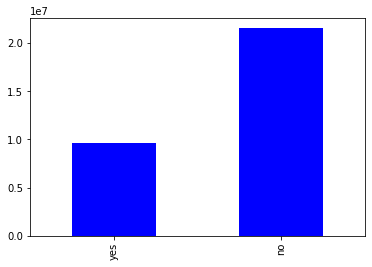

In [158]:
#create bar chart
bar_baby=df_merged['Has_baby'].value_counts(dropna=False).sort_values(ascending=True).plot.bar(color=['blue'])

In [159]:
bar_baby.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_baby.final.png'))

# creating aggregates on baby flag

In [160]:
df_merged.groupby('Has_baby').agg({'prices': ['mean', 'max', 'min']})

prices           
              mean   max  min
Has_baby                     
no        7.772326  25.0  1.0
yes       7.833435  25.0  1.0

In [161]:
df_merged.groupby('Has_baby').agg({'Median_since_last_ordered': ['mean', 'max', 'min']})

Median_since_last_ordered           
                              mean   max  min
Has_baby                                     
no                       11.254911  30.0  0.0
yes                       8.476073  30.0  0.0

# comparing profile with regions and departments:

In [162]:
# has_baby in comparaison to region
baby_region=pd.crosstab(df_merged['Region'], df_merged['Has_baby'].sort_values(ascending=False))
baby_region=baby_region.reindex(['no', 'yes'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
baby_region

Has_baby,no,yes
Region,,
South,7468733,3323152
West,5762448,2530465
Midwest,5255842,2341483
Northeast,3063704,1400949


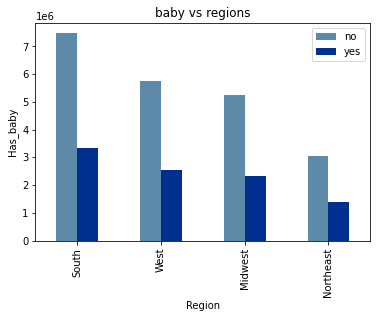

In [163]:
#Grouped bar chart. baby vs regions
bar_baby_region=baby_region.plot.bar(color=['#5D8AA8', '#00308F'])
plt.title('baby vs regions')
plt.xlabel('Region')
plt.ylabel('Has_baby')
plt.legend()

In [164]:
bar_baby_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_baby_region.final.png'))

In [165]:
#Measuring departments vs has_baby
baby_depart2=pd.crosstab(df_merged['department'], df_merged['Has_baby'])
baby_depart2=baby_depart2.reindex(['no', 'yes'], axis="columns")
baby_depart2

Has_baby,no,yes
department,,
alcohol,126851,20659
babies,0,407558
bakery,770237,357340
beverages,1945944,636203
breakfast,469602,206539
bulk,23909,9429
canned goods,714447,312518
dairy eggs,3502879,1685777
deli,712997,297391


In [166]:
#creating a bar chart for department vs has_baby
baby_depart3=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Has_baby'], normalize='index')
baby_depart3=baby_depart3.reindex(['no', 'yes'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
baby_depart3_labels=pd.crosstab(index=df_age_depart2['department'], columns=df_merged['Has_baby'])
baby_depart3_labels=baby_depart3_labels.reindex(['no', 'yes'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages'])
baby_depart3

Has_baby,no,yes
department,,
produce,0.701136,0.298864
dairy eggs,0.675103,0.324897
snacks,0.717461,0.282539
beverages,0.753615,0.246385


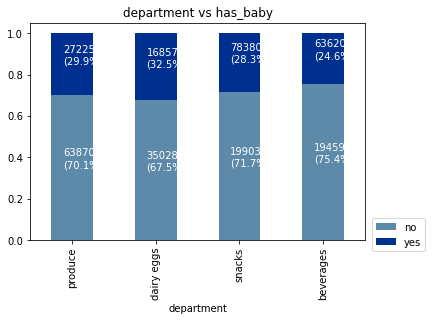

In [178]:
bar_baby_depart3=baby_depart3.plot.bar(stacked=True,color=['#5D8AA8', '#00308F'])
plt.title('department vs has_baby')
plt.xlabel('department')
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
for n, y in enumerate([*age_depart3.index.values]):
    for (proportion, count, x_loc) in zip(baby_depart3.loc[y],
                                         baby_depart3_labels.loc[y],
                                          baby_depart3.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white")

In [179]:
bar_Dependent_depart3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Dependent_depart3.final.png'))

# exporting data

In [169]:
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_cust_profile.pkl'))